In [1]:
from simulation.simulator import Simulator
from simulation.simulator_plots import SimulatorResults
import matplotlib.pyplot as plt

In [2]:
simulator = Simulator()

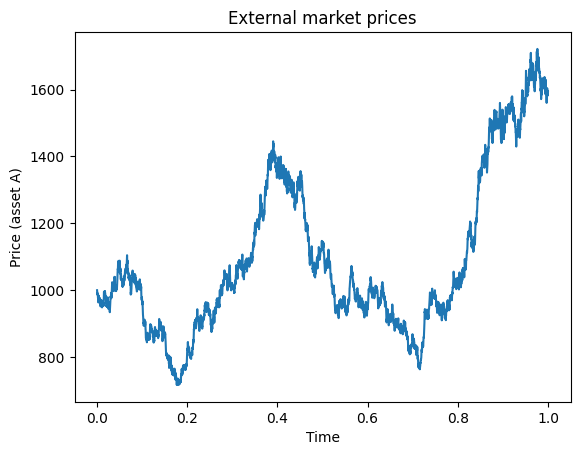

In [3]:
initial_A_price = 1000
mu = 0.2
sigma = 0.5
t = 1
n_steps = 4000

time_points, external_prices = simulator.simulate_gbm(initial_A_price, mu, sigma, t, n_steps)

plt.plot(time_points, external_prices)
plt.xlabel('Time')
plt.ylabel('Price (asset A)')
plt.title('External market prices')
plt.show()

In [4]:
xrpl_block_conf = 4
eth_block_conf = 12
xrpl_fees = 0.00075
eth_fees = 5
normal_users = 10
arbitrageurs = 3
safe_profit_margin = 2 # (%)
max_slippage = 5 # (%)
iterations = 10

sim = simulator.run_simulation(initial_A_price, external_prices, xrpl_block_conf, eth_block_conf, 
                               xrpl_fees, eth_fees, normal_users, arbitrageurs, 
                               safe_profit_margin/100, max_slippage/100, iterations)

In [5]:
results = SimulatorResults(sim, 'ETH', 'USDC', external_prices,mu, sigma, xrpl_block_conf, eth_block_conf, xrpl_fees, eth_fees, safe_profit_margin, max_slippage, iterations)

Arbitrageurs are more profitable on XRPL 90% of the time
Arbitrageurs are more profitable on XRPL_CAM 100% of the time
Arbitrageurs are more profitable on XRPL_CAM than XRPL 100% of the time
---
Price Sync. is better on XRPL 100% of the time
Price Sync. is better on XRPL_CAM 100% of the time
Price Sync. is better on XRPL_CAM than XRPL 80% of the time
---
LPs earn more on XRPL 60% of the time
LPs earn more on XRPL_CAM 100% of the time
LPs earn more on XRPL_CAM than XRPL 100% of the time


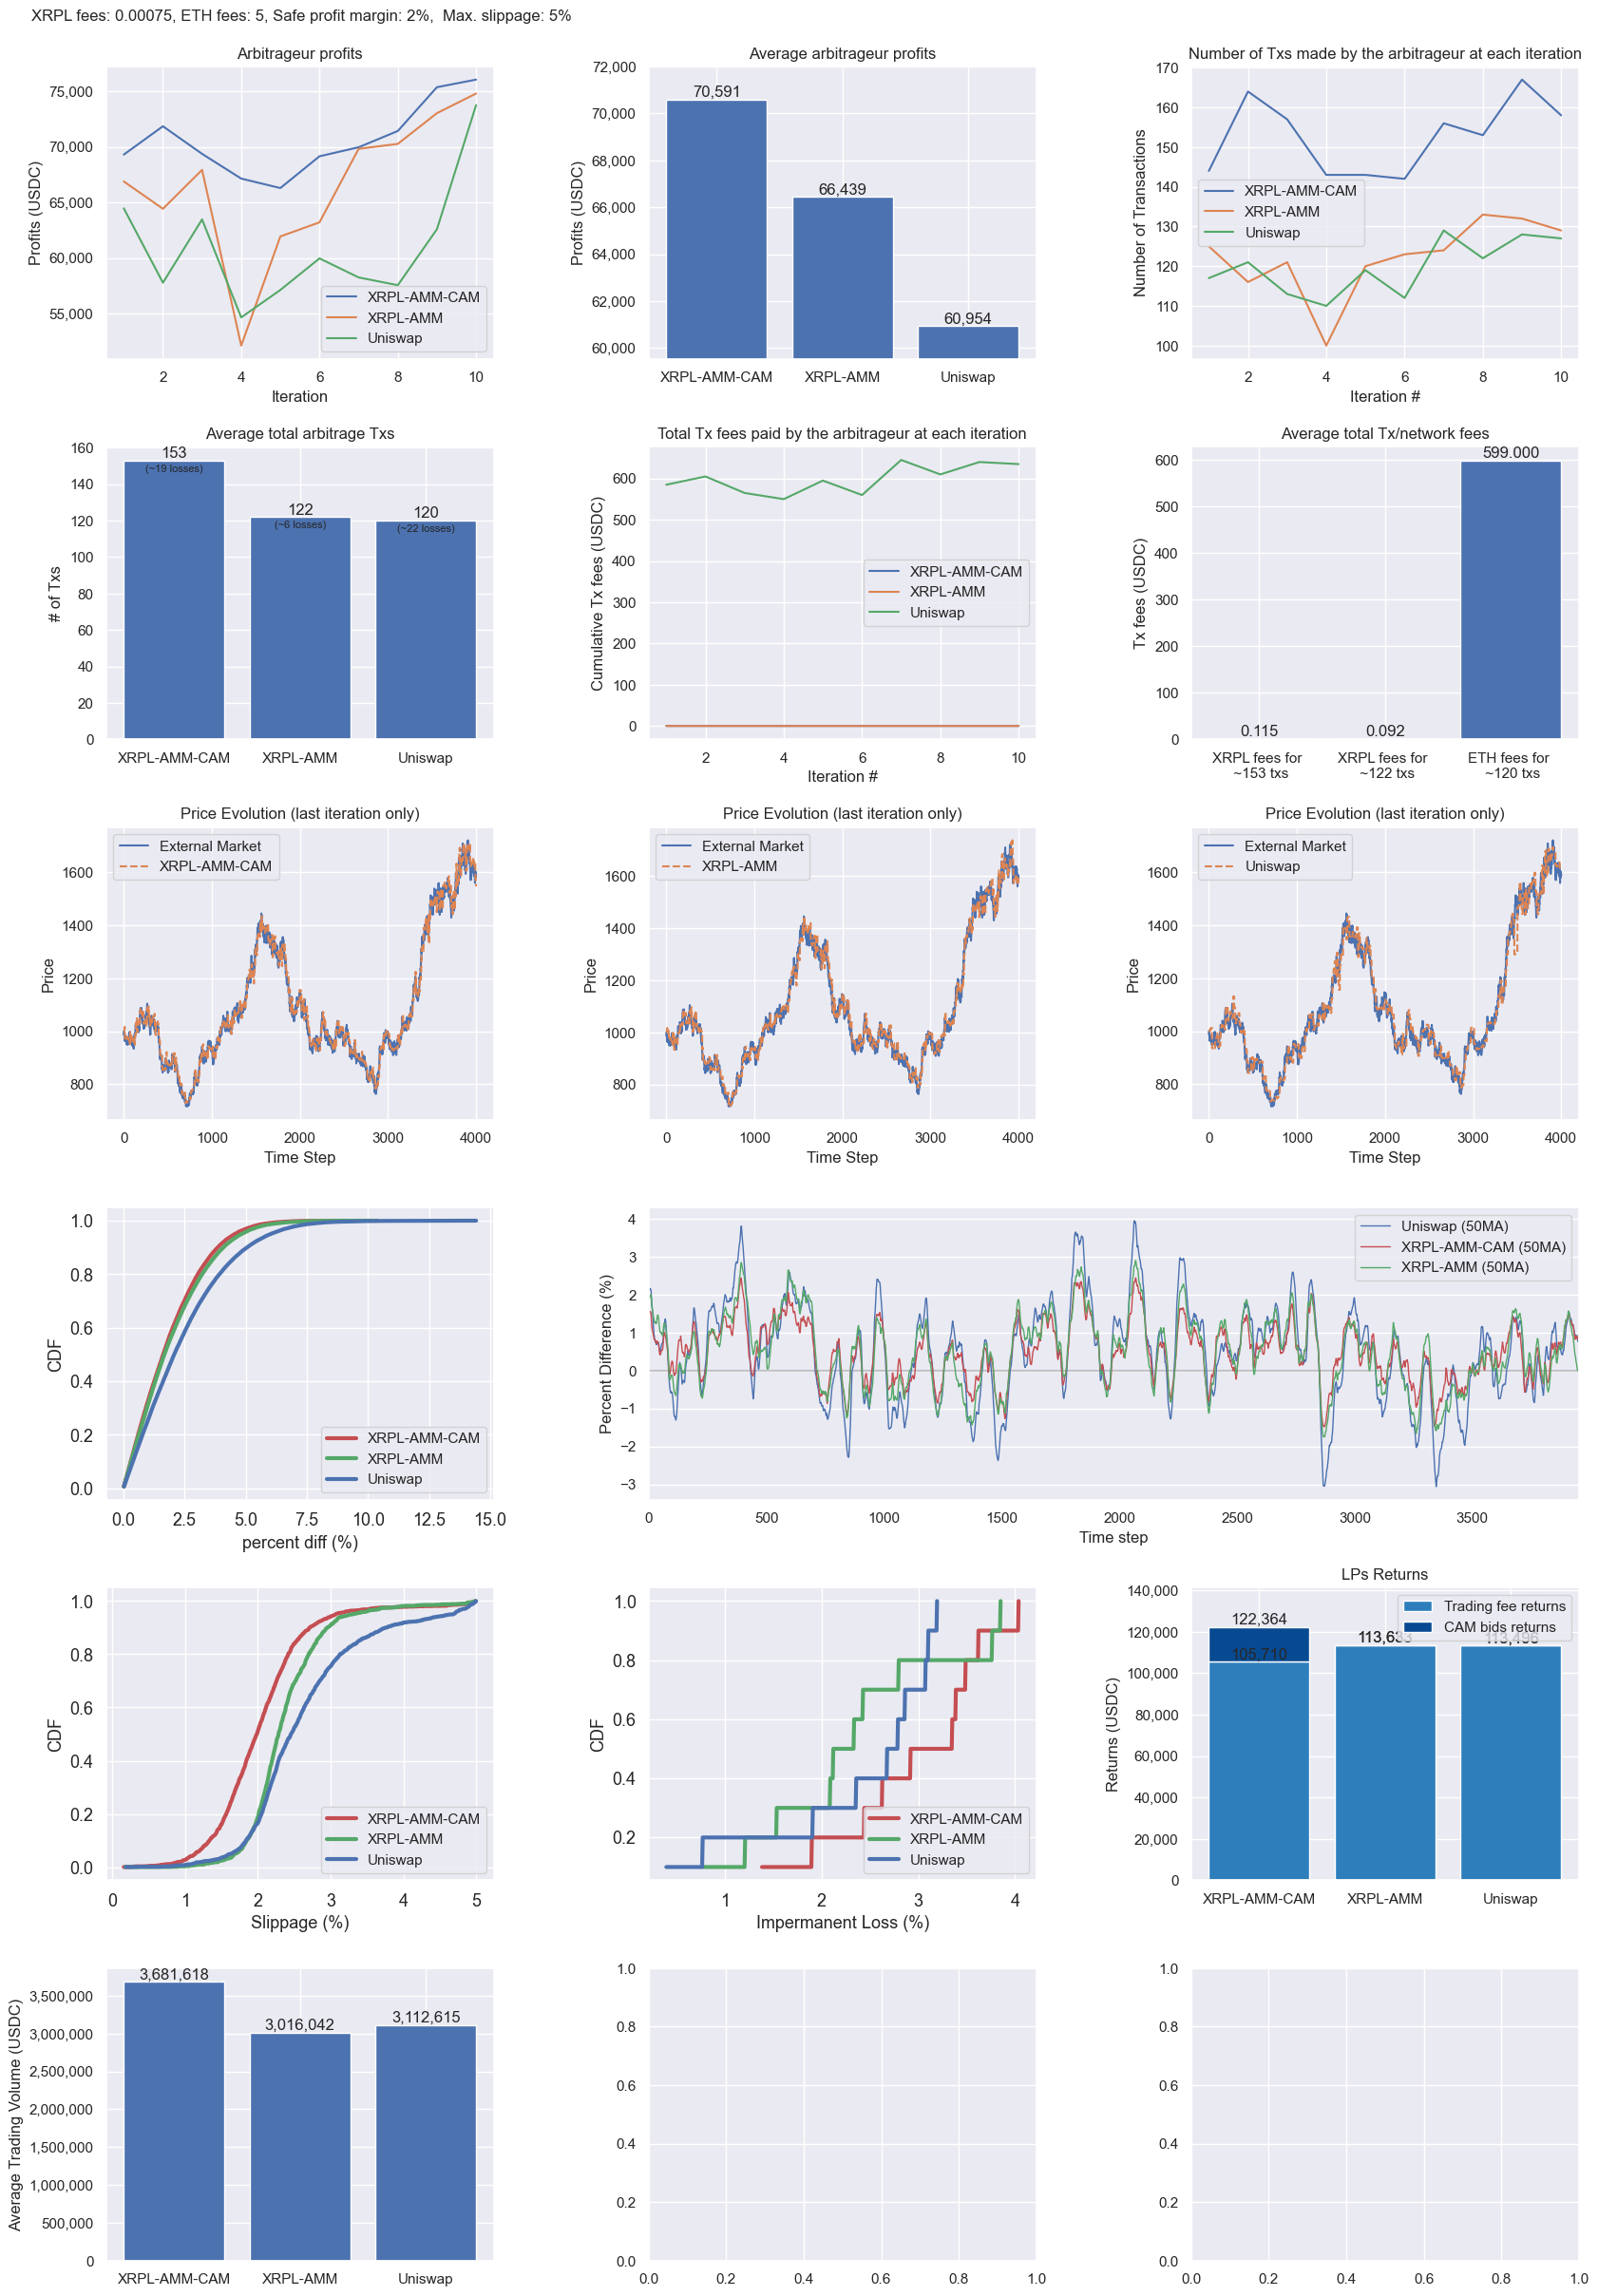

In [6]:
results.display_results()
# positive impermanent loss in CDF = impermanent gain

In [7]:
foldername_to_save_in = 'test1'
results.save_plots_results(foldername_to_save_in, set_title=False)
results.save_simulation_data(foldername_to_save_in)